# Homework 6 (Due before class on 2/21)

**Name:** Mingxue (Jacqueline) Li

For questions Q1-Q6, you can use code cells to make computations, but you should write your answer and derivations as text in a markdown cell, below **"Answer"**. 

Questions Q7-Q8 are coding questions to help you practice writing simulations.

## Q1. DMD Exercise 2.22 
A large retail company has stores at two locations in a city: a large department store and a discount outlet store. Weekly sales of umbrellas at the department store have a mean of 147.8 and a standard deviation of 50.1. Weekly sales of umbrellas at the discount outlet store have a mean of 63.2 and a standard deviation of 37.0. Sales of umbrellas in the two stores have a correlation of 0.7.

Umbrellas cost 17 dollars each at the department store and 9 dollars each at the outlet store. Compute the mean, variance, and standard deviation of the total (combined) umbrella sales revenue from the two stores. (To solve this question, you would have to use the formula in DMD Section 2.11.)

**Answer:**

$MEAN = E(17Dep+9Out) = 17E(Dep) + 9(Out) = 3081.4$

$VAR = VAR(17Dep)+VAR(9Out)+2corr(Dep,Out)\sigma(Dep)\sigma(Out)=1233344.4$

$STD = \sigma(17Dep+9Out)=\sqrt{VAR(17Dep+9Out)}=1110.6$

## Q2. DMD Exercise 2.25

Suppose 5 percent of the microchips produced by a leading microchip manufacturer are defective. Historically, given that a microchip is defective, the inspector (wrongly) accepts the chip 10 percent of the time, thinking it has no defect. If a microchip is not defective, he always correctly accepts it. Suppose that the inspector inspects 10 microchips.

(a) What is the probability that all 10 microchips in the sample are not defective?

(b) What is the probability that the inspector accepts a particular microchip?

(c) What is the probability that the inspector accepts 9 (out of 10) microchips?

(d) Given that the inspector accepts a microchip, what is the probability that it has no defect?

(e) Given that inspector accepts all 10 microchips, what is the probability that they all have no defects?

**Answer:**

(a) The probability that all 10 microchips in the sample are not defective is:
$(1-0.05)^{10}=0.95^{10}=0.599$

(b) The probability that the inspector accepts a particular microchip is:
$0.05*0.1+0.95 = 0.955$

(c) The probability that the inspector accepts 9 (out of 10) microchips is:
$C^9_{10}*(0.955)^9*(1-0.995)=0.297$

(d) Given that the inspector accepts a microchip, the probability that it has no defect is:
$0.95/(0.95+0.05*0.1) = 0.995$

(e) Given that inspector accepts all 10 microchips, the probability that they all have no defects is:
$0.995^{10}=0.951$

In [16]:
from scipy.stats import binom
binom(n=10,p=0.955).pmf(9)

0.2973328255894693

## Q3. DMD Exercise 2.27

In this exercise we examine the effects of overbooking in the airline industry. Ontario Gateway Airlines' first class cabins have 10 seats in each plane. Ontario's overbooking policy is to sell up to 11 first class tickets, since cancellations and no-shows are always possible (and indeed are quite likely). For a given flight on Ontario Gateway, there were 11 first class tickets sold. Suppose that each of the 11 persons who purchased tickets has a 20 percent chance of not showing up for the flight, and that the events that different persons show up for the flight are independent.

(a) What is the probability that at most 5 of the 11 persons who purchased first class tickets show up for the flight?

(b) What is the probability that exactly 10 of the persons who purchased first class tickets show up for the flight?

(c) Suppose that there are 10 seats in the first class available and that the cost of each first class ticket is 1,200 dollars. (This 1,200 contributes entirely to profit since the variable cost associated with a passenger on a flight is close to zero.) Suppose further that any overbooked seat costs the airline 3,000 dollars, which is the cost of the free ticket issued the passenger plus some potential cost in damanged customer relations. (First class passengers do not expect to be bumped!) Thus, for example, if 10 of the first class passengers show up for the flight, the airline's profit is 12,000. If 11 first class passengers show up, the profit is 9,000. What is the expected profit from first class passengers for this flight?

(d) Suppose that only 10 first class tickets were sold. What would be the expected profit from first class passengers for this flgith?

(e) People often travel in groups of two or more. Does this affect the independence assumption about passenger behavior? Why or why not?

**Answer:**

Total number of passengers showing up follows a binomial distribution with n = 11 and p = 0.8.

(a) The probability that at most 5 of the 11 persons who purchased first class tickets show up for the flight is:

$F(X\le5)=0.012$

(b) The probability that exactly 10 of the persons who purchased first class tickets show up for the flight is:

$P(X=10)=0.236$

(c) The expected profit from first class passengers for this flight is:

$E(X) = \sum\limits_{i=1}^n x_ip_i =10199.22$


(d) If only 10 first class tickets were sold, the expected profit from first class passengers for this flight would be:

$E(X) = 1200*E(X)=1200*0.8*10 =9600$

(e) This affects the independence assumption about passenger behavior. Since passenger behavior is not independent within that group. Pssengers in the same group tend to show up/not show up together.

In [17]:
import pandas as pd
hist = binom(n=11,p=0.8)
hist.cdf(5)
hist.pmf(10)

probs = pd.Series(hist.pmf(range(1,12)))
profits = 1200*pd.Series(range(1,11))
profits[10]=9000
sum(probs*profits)

hist = binom(n=10,p=0.8)
probs = pd.Series(hist.pmf(range(1,11)))
profits = 1200*pd.Series(range(1,11))
sum(probs*profits)

9600.000000000005

## Q4. DMD Exercise 3.6
Winter lasts from December 21 through March 21. The average winter temperature in Boston is Normally distributed with mean $\mu=32.5$ Fahrenheit and standard deviation is $\sigma=1.59$ Fahrenheit. In New York City, the average winter temperature is Normally distributed with mean $\mu=35.4$ Fahrenheit and standard deviation $\sigma=2.05$ Fahrenheit.

(a) What is the probability that the average winter temperature in Boston this coming winter will be above freezing (32 degrees Fahrenheit)?

(b) Assume that average winter temperatures in Boston and New York are independent. What is the probability that the average winter temperature in Boston in the coming winter will be higher than in New York?

(c) Do you think the independence assumption above is reasonable?

**Answer:**

(a) The desired probability is
$P(X\gt 32)=1-P(X\le32)=0.623$

(b) $(X-Y)$ follows a normal distribution of $N(32.5-35.4,\sqrt{1.59^2+2.05^2})$, that is, $N(-2.9,2.59^2)$

The probability that the average winter temperature in Boston in the coming winter will be higher than in New York is:

$P(X\gt Y)=P(X-Y \gt 0)=1-F((X-Y)\le0)=0.13$

(c) The independence assumption is not that reasonable because the two cities are close to each other.

In [18]:
from scipy.stats import norm
1-norm(-2.9,2.59).cdf(0)

0.13142270529071243

## Q5. DMD Exercise 3.12
A portfolio manager believes that tomorrow's foreign exchange rate of German marks per U.S. dollar will be Normally distributed with mean 2.03 and standard deviation 0.08. Using the manager's numbers, answer the following questions:

(a) What is the probability that tomorrow's rate will be above 2.08?

(b) What is the probability that tomorrow's rate will be below 1.85?

(c) What is the probability that tomorrow's rate will be between 2.00 and 2.20?

**Answer:**

(a) The probability that tomorrow's rate will be above 2.08 is

$P(X>2.08)=1-P(X\le 2.08)=1-0.73=0.270$

(b) The probability that tomorrow's rate will be below 1.85 is

$P(X\le 1.85)=0.012$

(c) The probability that tomorrow's rate will be between 2.00 and 2.20 is

$P(2.00 \le X \le 2.20)=P(X\le 2.20)-P(X\le 2.00)=0.629$

In [19]:
hist = norm(2.03,0.08)
1-hist.cdf(2.08)
hist.cdf(1.85)
hist.cdf(2.2)-hist.cdf(2)

0.6293764602242743

## Q6. DMD Exercise 3.20

The paint department in an automobile factory applies two processes when painting cars: (i) painting and (ii) polishing. The painting process is defective 20\% of the time, while the polishing process is defective 10\% of the time. Each car first goes through the painting and then through the polishing process. Each car is inspected after it has completed the two processes. If either the painting or the polishing is defective, the car is returned to a special station for rework, where the two processes are applied once again. Rework at the special station is 100\% reliable (although it is also very expensive).

(a) What is the probability that a car is returned to the special station for rework?

(b) In a batch of 1000 cars, what is the expected number of cars that will be returned for rework?

(c) In a batch of 1000 cars, what is the probability that the number of returned cars is less than or equal to 200?

(d) Let $X$ be the number of cars in a group by 1000 cars that have painting defects. Let $Y$ be the number of cars in a group of 1000 cars that have polishing defects. What is the distribution of $X$? What is the distribution of $Y$?

(e) What is the probabiltiy that the total number of defects, $X+Y$, is less than or equal to 300?


**Answer**

(a) The probability that a car is returned to the special station for rework is:

$1-(1-0.2)*(1-0.1)=0.28$

(b) The expected number of cars that will be returned for rework is:

$1000*0.28=280$

(c) The number of returned cars follows a binomial distribution with n = 1000 and p = 0.28

$P(X\le200) = 3.6*10^{-9}$

(d) $X$ follows a binomial distribution with n = 1000 and p = 0.2, $Y$ follows a binomial distribution with n = 1000 and p = 0.1.

(e) $X$ follows a binomial distribution with n = 1000 and p = 0.2. Approximately, $X$ follows $N(200,12.65^2)$

$Y$ follows a binomial distribution with n = 1000 and p = 0.1. Approximately $Y$ follows $N(100,9.49^2)$

Thus, $(X+Y)$ approximately follows $N(300, 15.81^2)$

so the probabiltiy that the total number of defects, $X+Y$, is less than or equal to 300 is:
$P(X+Y \le 300)=0.5$

In [20]:
1-(1-0.2)*(1-0.1)
binom(3000,0.1).cdf(300)

0.5153700633598488

## Q7. Sampling from an Arbitrary Discrete Distribution

The `scipy.stats.rv_discrete` package only supports discrete distributions with integer values. In this exercise, you will write a function `sample(probabilities,values)` that takes two inputs:
- `probabilities`: a list of non-negative numbers adding up to one.
- `values`: a list of numerical values, not necessarily positive or integer. 
The function should return a random value from the list `values`, based on the corresponding probabilities.

For example, the code
```
sample([0.5,0.1,0.4],[3.5,-1,4.2])
```

Should return 3.5 with probability .5, -1 with probability 0.1, and 4.2 with probability 0.4.

Write your function in the code cell below, and test it by drawing 10,000 samples and checking whether the frequencies of values correspond approximately to the probabilities you input.

**Hint:**
You can sample from an arbitrary discrete distribution by first drawing a uniformly random sample from 0 to 1, using the `np.random.random()` function or the `scipy.stats.uniform` package. Call this uniform random sample `z`. Then in the above example, you would return 3.5 if `z` is between 0 and 0.5, return -1 if `z` is between 0.5 and 0.6, and return 4.2 if `z` is between 0.6 and 1.

In [1]:
import numpy as np
np.cumsum([0.5,0.1,0.4])

array([0.5, 0.6, 1. ])

In [21]:
import numpy as np
def sample(probabilities,values):
    from scipy.stats import uniform
    p = np.cumsum(probabilities)
    value = uniform(0,1).rvs()
    for index,v in enumerate(p):
        if v >= value:
            return values[index]
            break
            
sample([0.5,0.1,0.4], [3.5,-1,4.2])

4.2

## Q8. Simulating Distribution of Daily Earnings at Rockport

In this exercise, you will use the `scipy.stats` package to generate normal and general discrete samples, in order to plot the shape of the probability distributions of the daily earnings from using Rockport in the example in DMD 5.1 (from pre-class readings). Simulate 10000 samples and plot the frequency instead of the density. You should also include the proper titles and labels of the x and y axis. Write your code in the code cell below (a correct sample graph is below).

**Hints:**
See page 196-197 in DMD for description of the distribution. It has the form $price*min(demand,3500)-10000$, where price is normally distributed with mean $\mu = 3.65$ and standard deviation of $\sigma=0.2$, demand follows a discrete distribution, as in the following table. (You can either use your code from Q7 to sample from the discrete distribution, or use `scipy.stats.rv_discrete` since all the values are integers. Or you can try both and see if the results are approximately the same.) You should make the price zero whenever you get a negative sample.

| Demand (lbs of codfish) | Probability |
|--|--|
|0 | 0.02|
|1000|0.03|
|2000|0.05|
|3000|0.08|
|4000|0.33|
|5000|0.29|
|6000|0.20|



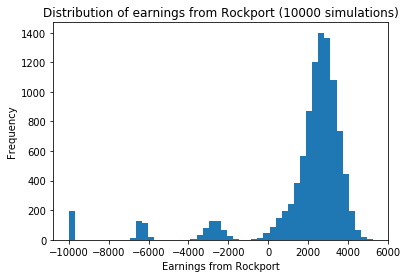

In [23]:
from scipy.stats import norm
from scipy.stats import rv_discrete
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
data=[]
dist = norm(3.65,0.2)
demand=rv_discrete(values=((0,1000,2000,3000,4000,5000,6000),(0.02,0.03,0.05,0.08,0.33,0.29,0.20)))
for i in range(10000):
    simpri = max(dist.rvs(),0)
    data.append((simpri*min(demand.rvs(),3500))-10000)
samples = pd.Series(data)
samples.hist(bins=50)
plt.grid()
plt.title('Distribution of earnings from Rockport (10000 simulations)')
plt.xlabel('Earnings from Rockport')
plt.ylabel('Frequency')
plt.show()

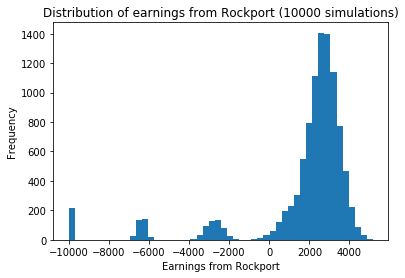

In [1]:
# Sample output (your code should output a graph that looks essentially identically)